In [1]:
# Importing all the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the data set:

titanic_data = pd.read_csv("titanic-data.csv", index_col = 0)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Creating modified data by removing the variables 'Ticket' & 'Cabin' for analysis:

tdn = titanic_data.drop(['Ticket', 'Cabin'], axis=1)
tdn.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
# Cleaning data further:

titanic_data_final = tdn.dropna(how='any')
titanic_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


Populating the interactive namespace from numpy and matplotlib
Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


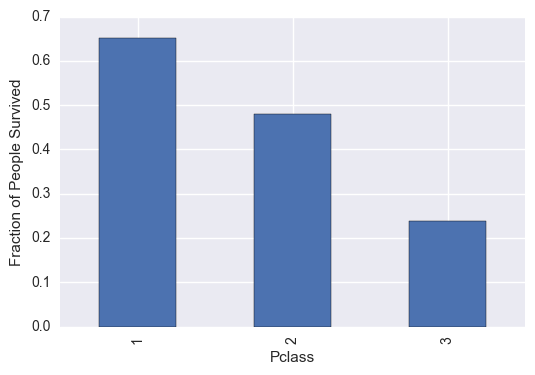

In [5]:
# 1st Relationship: Survived and Passenger Class

%pylab inline

S1 = titanic_data_final['Survived'].groupby(titanic_data_final['Pclass'])
print S1.mean()
S1.mean().plot(kind='bar')
plt.ylabel('Fraction of People Survived')

In [6]:
# Number of Survivors based on Passenger Class:

Survivors_Pclass1_Num = titanic_data_final[(titanic_data_final.Survived == 1) & (titanic_data_final.Pclass == 1)]
Survivors_Pclass2_Num = titanic_data_final[(titanic_data_final.Survived == 1) & (titanic_data_final.Pclass == 2)]
Survivors_Pclass3_Num = titanic_data_final[(titanic_data_final.Survived == 1) & (titanic_data_final.Pclass == 3)]

print 'Pclass 1 Surviviors Number:', len(Survivors_Pclass1_Num)
print 'Pclass 2 Surviviors Number:', len(Survivors_Pclass2_Num)
print 'Pclass 3 Surviviors Number:', len(Survivors_Pclass3_Num)

Pclass 1 Surviviors Number: 120
Pclass 2 Surviviors Number: 83
Pclass 3 Surviviors Number: 85


Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64
Male Survivors Number: 93
Female Survivors Number: 195
Total Survivors Number 288
Percent of Male Survivors: 20
Percent of Female Survivors: 75


([<matplotlib.patches.Wedge at 0xbf63b00>,
 [<matplotlib.text.Text at 0xbf593c8>, <matplotlib.text.Text at 0xc09db00>])

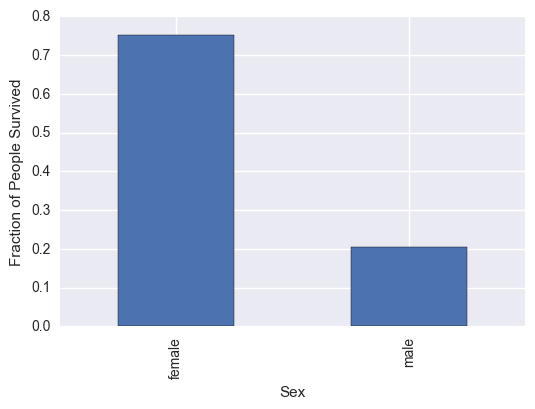

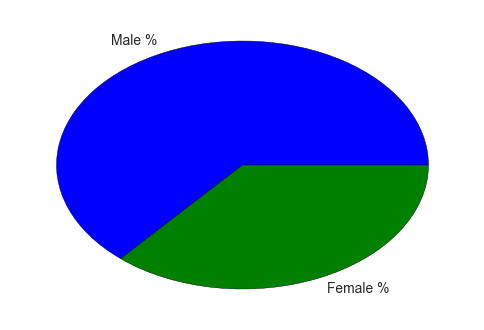

In [7]:
# 2nd Relationship: Survived and Sex:

S2 = titanic_data_final['Survived'].groupby(titanic_data_final['Sex'])
print S2.mean()
S2.mean().plot(kind='bar')
plt.ylabel('Fraction of People Survived')

# Number of Survivors based on Sex:

Survivors_Male_Num = titanic_data_final[(titanic_data_final.Survived == 1) & (titanic_data_final.Sex == 'male')]
Survivors_Female_Num = titanic_data_final[(titanic_data_final.Survived == 1) & (titanic_data_final.Sex == 'female')]
Total_Survivors_Num = len(Survivors_Male_Num) + len(Survivors_Female_Num)

print 'Male Survivors Number:', len(Survivors_Male_Num)
print 'Female Survivors Number:', len(Survivors_Female_Num)
print 'Total Survivors Number', Total_Survivors_Num

# Percent of Survivors by Sex:

Total_Male_Num = titanic_data_final[titanic_data_final.Sex == 'male']
Total_Female_Num = titanic_data_final[titanic_data_final.Sex == 'female']

print 'Percent of Male Survivors:', len(Survivors_Male_Num)*100/len(Total_Male_Num)
print 'Percent of Female Survivors:', len(Survivors_Female_Num)*100/len(Total_Female_Num)


# Total Population Mixture:

figure()
pie([len(Total_Male_Num)*100/712, len(Total_Female_Num)*100/712], labels=['Male %', 'Female %'])



count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


E:\Softwares\Anaconda2\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Softwares\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Young Surviviors Number: 124
Middle Aged Surviviors Number: 143
Old Surviviors Number: 21


([<matplotlib.patches.Wedge at 0xbdf1f60>,
  <matplotlib.text.Text at 0xbf63fd0>])

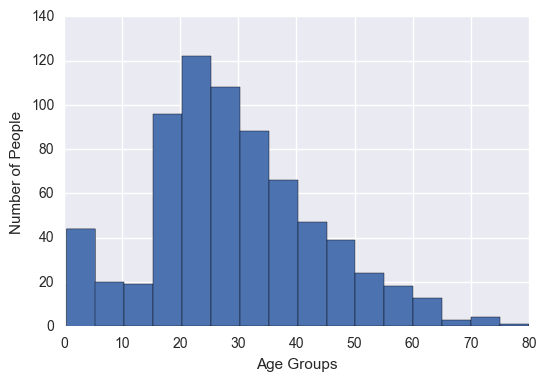

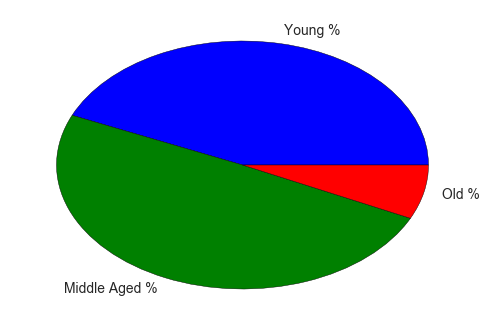

In [8]:
# 3rd Relationship: Survived and Age:


def AgeGroups(P, A1, A2):
    
    
    if P[0] == 1:
        if P[1] >= A1:
            if P[1] <= A2:
                return 1
            
            else:
                return 0    
    else:
        return 0

    
S3 = titanic_data_final['Survived'].groupby(titanic_data_final['Age'])
print titanic_data_final['Age'].describe()

titanic_data_final['Age'].plot(kind='hist', bins = 16)
plt.xlabel('Age Groups')
plt.ylabel('Number of People')


# Percent of Survivors based on Age Groups:
# Considering 3 groups of age:
# 1. Young (0-25 years)
# 2. Middle Aged (26-50 years)
# 3. Old (51-80 years)

# You Can Change the Limits for Grouping Age By using AgeGroups Function:
        
    
titanic_data_final.loc[:, 'Young_Survived'] = titanic_data_final[['Survived', 'Age']].apply(
    AgeGroups, axis=1, args = [float(0), float(25)])

titanic_data_final.loc[:, 'Middle_Survived'] = titanic_data_final[['Survived', 'Age']].apply(
    AgeGroups, axis=1, args = [float(26), float(50)])

titanic_data_final.loc[:, 'Old_Survived'] = titanic_data_final[['Survived', 'Age']].apply(
    AgeGroups, axis=1, args = [float(51), float(80)])

Young_Survivors_Num = titanic_data_final[(titanic_data_final.Young_Survived == 1)]
MiddleAge_Survivors_Num = titanic_data_final[(titanic_data_final.Middle_Survived == 1)]
Old_Survivors_Num = titanic_data_final[(titanic_data_final.Old_Survived == 1)]

print 'Young Surviviors Number:', len(Young_Survivors_Num)
print 'Middle Aged Surviviors Number:', len(MiddleAge_Survivors_Num)
print 'Old Surviviors Number:', len(Old_Survivors_Num)

figure()
pie([int(len(Young_Survivors_Num))*100/Total_Survivors_Num, int(len(MiddleAge_Survivors_Num))*100/Total_Survivors_Num, 
     int(len(Old_Survivors_Num))*100/Total_Survivors_Num], labels=['Young %', 'Middle Aged %', 'Old %'])


Single Surviviors Number: 128
Family Surviviors Number: 160


([<matplotlib.patches.Wedge at 0xd43c7b8>,
 [<matplotlib.text.Text at 0xd432b70>, <matplotlib.text.Text at 0xd37b278>])

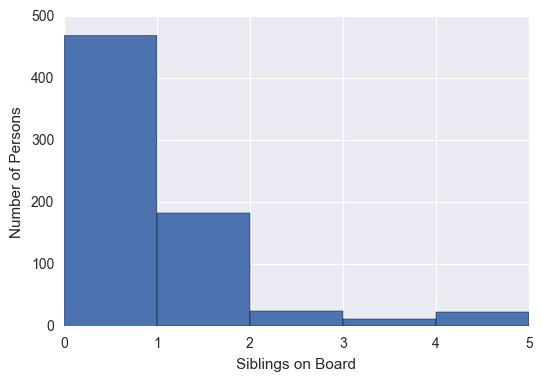

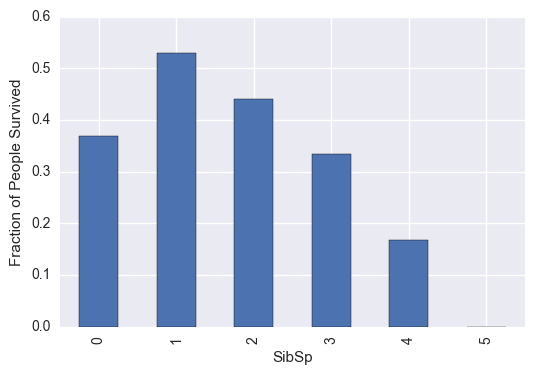

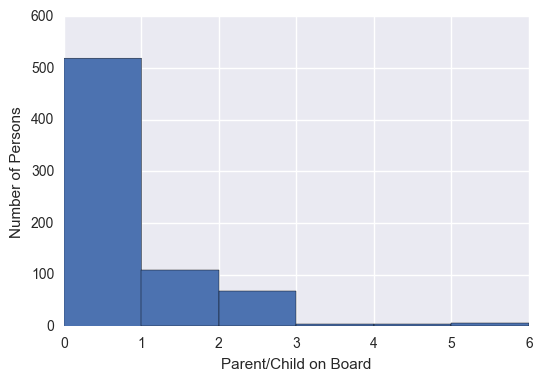

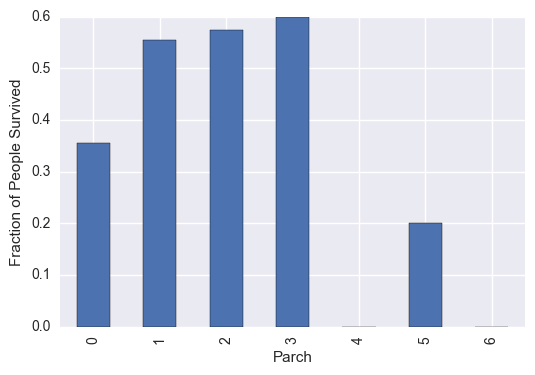

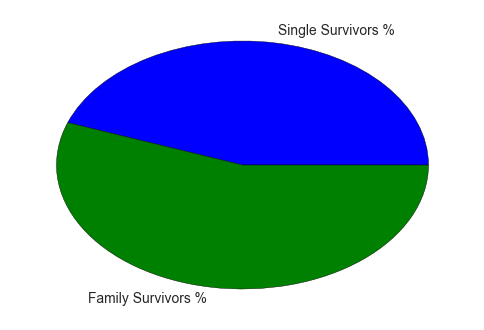

In [9]:
# 4th Relationship: Survived and Marital Status (Single/Family):

titanic_data_final['SibSp'].plot(kind='hist', bins = 5)
plt.xlabel('Siblings on Board')
plt.ylabel('Number of Persons')

figure()
S4 = titanic_data_final['Survived'].groupby(titanic_data_final['SibSp'])
S4.mean().plot(kind='bar')
plt.ylabel('Fraction of People Survived')

figure()
titanic_data_final['Parch'].plot(kind='hist', bins = 6)
plt.xlabel('Parent/Child on Board')
plt.ylabel('Number of Persons')

figure()
S5 = titanic_data_final['Survived'].groupby(titanic_data_final['Parch'])
S5.mean().plot(kind='bar')
plt.ylabel('Fraction of People Survived')

# Percent of Survivors based on Single/Family Status:
# Considering 2 groups:
# 1. Single (No parent and sibling on board)
# 2. Family (Parent or sibling on board)



Single_Survivors_Num = titanic_data_final[(titanic_data_final.Survived == 1) &
                                          ((titanic_data_final.SibSp == 0) & (titanic_data_final.Parch == 0)) ]

Family_Survivors_Num = titanic_data_final[(titanic_data_final.Survived == 1) &
                                          ((titanic_data_final.SibSp != 0) | (titanic_data_final.Parch != 0)) ]


print 'Single Surviviors Number:', len(Single_Survivors_Num)
print 'Family Surviviors Number:', len(Family_Survivors_Num)

figure()
pie([len(Single_Survivors_Num)*100/Total_Survivors_Num, len(Family_Survivors_Num)*100/Total_Survivors_Num], 
    labels=['Single Survivors %', 'Family Survivors %'])



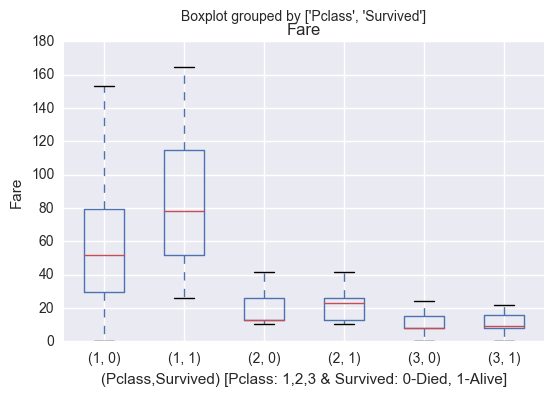

In [10]:
# 5th Relationship: Survived, Pclass & Fare:

titanic_data_final.boxplot(column='Fare', by=['Pclass', 'Survived'])
plt.ylim((0,180))
plt.ylabel('Fare')
plt.xlabel('(Pclass,Survived) [Pclass: 1,2,3 & Survived: 0-Died, 1-Alive]')

Embarked       
C         count    130.000000
          mean       0.607692
          std        0.490153
          min        0.000000
          25%        0.000000
          50%        1.000000
          75%        1.000000
          max        1.000000
Q         count     28.000000
          mean       0.285714
          std        0.460044
          min        0.000000
          25%        0.000000
          50%        0.000000
          75%        1.000000
          max        1.000000
S         count    554.000000
          mean       0.362816
          std        0.481247
          min        0.000000
          25%        0.000000
          50%        0.000000
          75%        1.000000
          max        1.000000
Name: Survived, dtype: float64


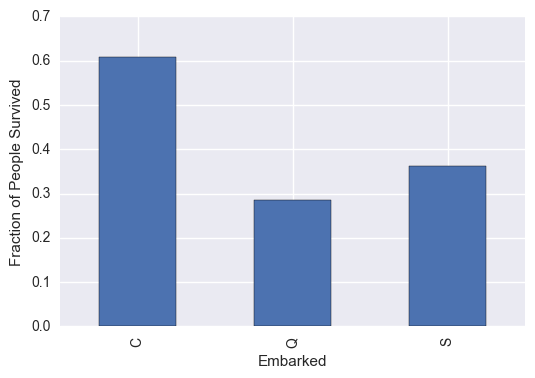

In [11]:
# 6th Relationship: Survived and Embarkment:

S6 = titanic_data_final['Survived'].groupby(titanic_data_final['Embarked'])
print S6.describe()
S6.mean().plot(kind='bar')
plt.ylabel('Fraction of People Survived')



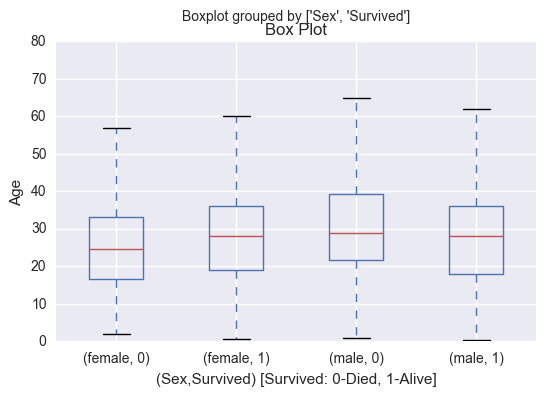

In [12]:
# 7th Relationship: Survived, Age & Sex:

titanic_data_final.boxplot(column='Age', by=['Sex', 'Survived'])
plt.ylabel('Age')
plt.title('Box Plot')
plt.xlabel('(Sex,Survived) [Survived: 0-Died, 1-Alive]')

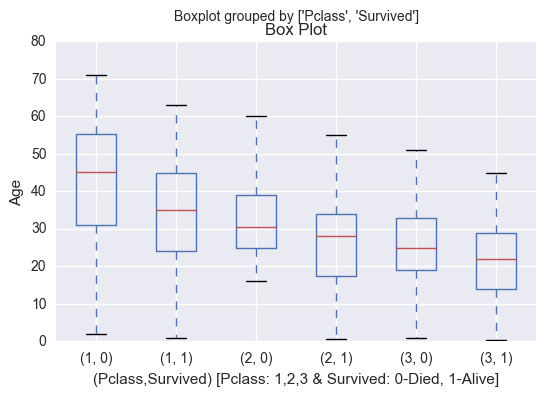

In [13]:
# 8th Relationship: Survived, Age & Pclass:

titanic_data_final.boxplot(column='Age', by=['Pclass', 'Survived'])
plt.ylabel('Age')
plt.xlabel('(Pclass,Survived) [Pclass: 1,2,3 & Survived: 0-Died, 1-Alive]')
plt.title('Box Plot')

In [24]:
# 9th Relationship: Survived & Sex Statistical Test:

# Chi-Squared Tests
from scipy.stats import chi2_contingency

# Sex to Survivability
pivot = pd.pivot_table(data = titanic_data_final[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)
print pivot,"\n"

chi2, p_value, dof, expected = chi2_contingency(pivot)

print "Results of Chi-Squared test on Sex to Survival:"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Sex       female  male
Survived              
0             64   360
1            195    93 

Results of Chi-Squared test on Sex to Survival:
Chi-Squared Score = 202.869448776
Pvalue = 4.93941668545e-46


